## Packages

In [1]:
# Import packages
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

from PIL import Image
from pathlib import Path
import random

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Parameters

In [2]:
# Directories
TEST_DIR_NAME = "data/test"
TRAIN_DIR_NAME = "data/train"
VAL_DIR_NAME = "data/valid"

# Image parameters
IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64
IMAGE_SIZE = 3

# Proportion of train, validation and test data
VAL_TEST_PROPORTION = 0.25 # Proportion of validation and test data to train data
TEST_PROPORTION = 0.5 # Proportion of test data to train data

# Number of images
N_TRAIN_IMAGES = 4000
N_VAL_IMAGES = (1 - TEST_PROPORTION) * VAL_TEST_PROPORTION *  N_TRAIN_IMAGES
N_TEST_IMAGES = TEST_PROPORTION * VAL_TEST_PROPORTION *  N_TRAIN_IMAGES

## Data setup

source : https://www.kaggle.com/datasets/abdelghaniaaba/wildfire-prediction-dataset

### Import images and labels

In [3]:
# Function to import images and labels
def import_images_and_labels(import_path_name, n_images):
    import_dir = Path(import_path_name)

    images = []
    labels = []
    
    i = 0
    for directory in os.listdir(import_dir):
        i = 0
        if directory != ".DS_Store":
            for file_name in os.listdir(import_dir / directory):
                if file_name != ".DS_Store":
                    image_path = import_dir / directory / file_name
                    image = np.array(Image.open(image_path).resize((IMAGE_WIDTH, IMAGE_HEIGHT)))/255
                    images.append(image)
                    labels.append(directory)
                    i += 1
                    if i >= n_images/2:
                        break
    return np.array(images), np.array(labels)

In [4]:
# Import train data
X_train, y_label_train = import_images_and_labels(TRAIN_DIR_NAME, N_TRAIN_IMAGES)

# Import validation data
X_val, y_label_val = import_images_and_labels(VAL_DIR_NAME, N_VAL_IMAGES)

# Import test data
X_test, y_label_test = import_images_and_labels(TEST_DIR_NAME, N_TEST_IMAGES)

### Replace labels with numbers
1 : wildfire 

0 : no wildfire

In [5]:
# Function to replace labels with numbers
# 1 : wildfire
# 0 : no wildfire
def replace_labels(labels):
    y = []
    for label in labels:
        if label == 'wildfire':
            y.append(1)
        else:
            y.append(0)
    return np.array(y)

In [6]:
y_train = replace_labels(y_label_train)
y_val = replace_labels(y_label_val)
y_test = replace_labels(y_label_test)

### Visualisation

In [7]:
print('Dimdensions of dataset (number of images, width, height, channels), (number of labels, ) :')
print('Train : ' + str(X_train.shape) + ', ' + str(y_train.shape))
print('Validation : ' + str(X_val.shape) + ', ' + str(y_val.shape))
print('Test : ' + str(X_test.shape) + ', ' + str(y_test.shape))

Dimdensions of dataset (number of images, width, height, channels), (number of labels, ) :
Train : (4000, 64, 64, 3), (4000,)
Validation : (500, 64, 64, 3), (500,)
Test : (500, 64, 64, 3), (500,)


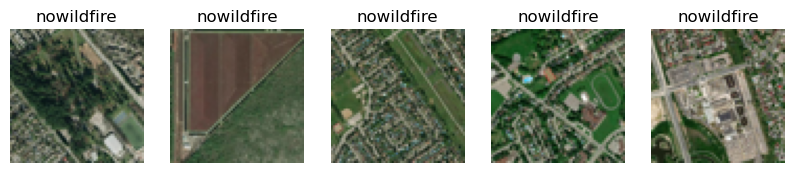

In [8]:
# Display random images
n_images_display = 5 # Number of images to display

random_indices = random.sample(range(len(X_train)), n_images_display)
random_images = [X_train[i] for i in random_indices]
random_labels = [y_label_train[i] for i in random_indices]

fig, axes = plt.subplots(1, n_images_display, figsize=(10, 5))

for i in range(n_images_display):
    axes[i].imshow(random_images[i])
    axes[i].set_title(random_labels[i])
    axes[i].axis('off')

plt.show()

## Model

### Build of CNN model

In [9]:
model1 = Sequential([
        Conv2D(16,(3,3),padding='same', activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_SIZE), name='conv_1'),
        Conv2D(8,(3,3),padding='same', activation='relu', name='conv_2'),
        MaxPooling2D((8,8), name='pool'),
        Flatten(name='flatten'),
        Dense(32, activation='relu', name='dense_1'),
        Dense(10,activation='softmax', name='dense_2')
    ])

model1.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_1 (Conv2D)                 │ (None, 64, 64, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2 (Conv2D)                 │ (None, 64, 64, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool (MaxPooling2D)             │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,354 (71.70 KB)

 Trainable params: 18,354 (71.70 KB)

 Non-trainable params: 0 (0.00 B)

### Compilation

In [10]:
model1.compile(optimizer='adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

### Initial accuracy

In [11]:
initial_test_loss, initial_test_acc = model1.evaluate(x=X_train, y=y_train, verbose=1)

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0135 - loss: 2.4260


### Training

In [12]:
n_epochs = 15
history = model1.fit(X_train, y_train,
                    epochs=n_epochs,
                    verbose=1,
                    validation_data=(X_val, y_val))

Epoch 1/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5345 - loss: 1.1406 - val_accuracy: 0.8820 - val_loss: 0.2794
Epoch 2/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8793 - loss: 0.2983 - val_accuracy: 0.9240 - val_loss: 0.2118
Epoch 3/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8866 - loss: 0.2688 - val_accuracy: 0.9380 - val_loss: 0.1815
Epoch 4/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9002 - loss: 0.2523 - val_accuracy: 0.9100 - val_loss: 0.2190
Epoch 5/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9056 - loss: 0.2241 - val_accuracy: 0.9420 - val_loss: 0.1625
Epoch 6/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8982 - loss: 0.2398 - val_accuracy: 0.9340 - val_loss: 0.1780
Epoch 7/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9138 - loss: 0.2183 - val_accuracy: 0.9480 - val_loss: 0.1503
Epoch 8/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9266 - loss: 0.1874 - val_accu

### Evaluation

In [16]:
score = model1.evaluate(X_test, y_test, verbose=0)
print('Test accuracy: ', round(score[1], 3))

Test accuracy:  0.96


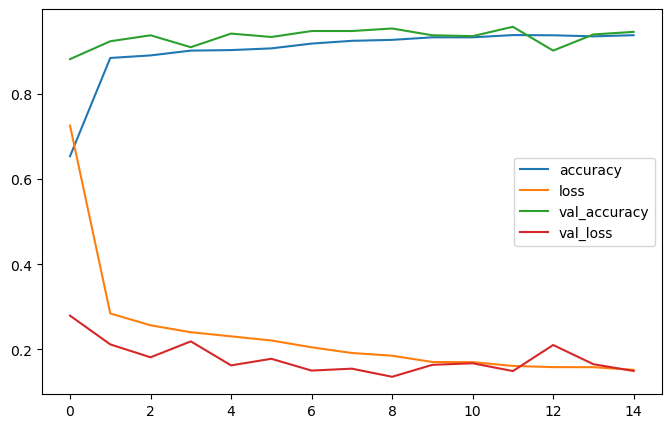

In [17]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()